In [1]:
import numpy as np
import matplotlib.pyplot as plt

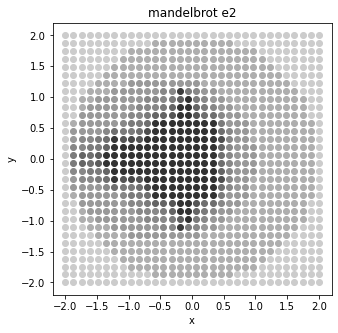

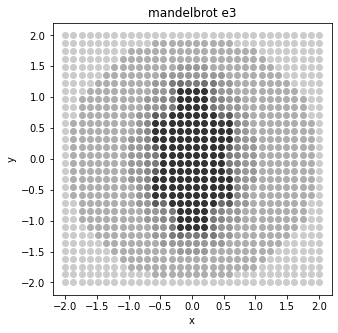

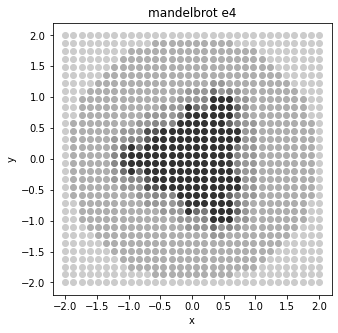

In [3]:
class Mandelbrot:
  def __init__(self,exp=2):
    self.exp = exp
    if self.exp<2:
      raise ValueError
  def calculateM(self, c):
      z=0
      M=0
      while abs(z) <= 2 and M < 15:
        z = z**self.exp + c
        M += 1
      return M
  def makePlot(self):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f'mandelbrot e{self.exp}')
    xlist, ylist, mlist = [], [], []
    for x in np.linspace(-2,2,int(1024 ** 0.5)):
      for y in np.linspace(2,-2,int(1024 ** 0.5)):
        c = complex(x,y)
        xlist.append(x)
        ylist.append(y)
        mlist.append((2/3)*np.log10(self.calculateM(c)+1))
    for i in range(len(mlist)):
      plt.scatter(xlist[i],ylist[i], color = (1 - mlist[i], 1 - mlist[i], 1 - mlist[i]))
    plt.savefig(f'mandelbrot_e{self.exp}.png')
Mandelbrot(2).makePlot()
Mandelbrot(3).makePlot()
Mandelbrot(4).makePlot()

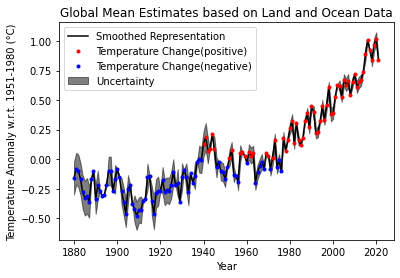

In [ ]:
fileNameData = "/content/Global_Mean_Estimates_based_on_Land_and_Ocean_Data.txt"
fileNameError = "/content/Global_Mean_Estimates_based_on_Land_and_Ocean_Data_errors.txt"
data = np.loadtxt(fileNameData, skiprows = 5)
error = np.loadtxt(fileNameError)
def Convert(lst):
	res_dct = {lst[i][0]: lst[i][1] for i in range(len(lst))}
	return res_dct
dic = Convert(error)
uncertainty = []
posTemp = []
negTemp = []
for i in range(len(data)):
  if float(data[i][0]) in dic.keys():
    uncertainty.append(dic[float(data[i][0])])
  else:
    uncertainty.append(0)
  if data[i][1] > 0:
    posTemp.append(data[i][1])
    negTemp.append(np.nan)
  else:
    negTemp.append(data[i][1])
    posTemp.append(np.nan)
uncertainty = np.array(uncertainty)
plt.plot(data[:,0],data[:,1],color="0",label = "Smoothed Representation")
plt.plot(data[:,0],posTemp,'r.', label = "Temperature Change(positive)")
plt.plot(data[:,0],negTemp,'b.', label = "Temperature Change(negative)")
plt.fill_between(data[:,0], data[:,1] - uncertainty, data[:,1] + uncertainty, color = "0", label = "Uncertainty", alpha = 0.5)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly w.r.t. 1951-1980 (°C)')
plt.title('Global Mean Estimates based on Land and Ocean Data')
plt.legend()